In [8]:
import gzip
import struct
import os
import numpy as np
import tensorflow as tf

In [57]:
import math

In [55]:
from tensorflow.python.framework import ops
np.random.seed(1)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def load_mnist(path, kind='train'):
  

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        struct.unpack('>II', lbpath.read(8))
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8)

    with gzip.open(images_path, 'rb') as imgpath:
        struct.unpack(">IIII", imgpath.read(16))
        images = np.frombuffer(imgpath.read(), dtype=np.uint8).reshape(len(labels), 784)

    return images, labels

In [4]:

train_x, train_y = load_mnist('./', kind='train')
test_x, test_y = load_mnist('./', kind='t10k')

In [5]:
m_train = train_x.shape[0]
m_test = test_x.shape[0]
num_px = train_x.shape[1]

print("training set shape : ",train_x.shape)
print("training label shape : ", train_y.shape)
#print("training class shape : ", cls_train.shape)
print("test set shape : ", test_x.shape)
#print("test class shape : ", cls_test.shape)
print("test label shape : ", test_y.shape)
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
#print ("Each image is of size: (" + str(np.sqrt(num_px)) + ", " + str(np.sqrt(num_px)) ")

training set shape :  (60000, 784)
training label shape :  (60000,)
test set shape :  (10000, 784)
test label shape :  (10000,)
Number of training examples: m_train = 60000
Number of testing examples: m_test = 10000
Height/Width of each image: num_px = 784


In [6]:
class_name=['Top','Trouser','Pull over','Dress','Coat','Sandal','Skirt','Sneaker','Bag','Ankle boot']

In [9]:
def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    

    
    # Create a tf.constant equal to C (depth)
    C = tf.constant(C,name="C")
    
    # Use tf.one_hot
    one_hot_matrix = tf.one_hot(labels,C,axis=0)
    
    # Create the session 
    sess = tf.Session()
    

    one_hot = sess.run(one_hot_matrix)
    
   
    sess.close
    
    
    
    return one_hot

In [43]:
#labels = np.array([1,2,3,0,2,1])
y_train = one_hot_matrix(train_y, C = 10)
X_train = train_x/255.

y_test = one_hot_matrix(test_y,C = 10)
X_test = test_x/255.

X_train=X_train.T
X_test = X_test.T

print("train labels shape : " + str(y_train.shape))
print("train example shape : " + str(X_train.shape))

print("test labels shape : " + str(y_test.shape))
print("test labels shape : " + str(X_test.shape))


train labels shape : (10, 60000)
train example shape : (784, 60000)
test labels shape : (10, 10000)
test labels shape : (784, 10000)


**Our model**

linear+Relu -> linear + relu ->linear+relu ->linear-> softmax

In [46]:

def create_placeholders(n_x, n_y):
  
    X = tf.placeholder(tf.float32,shape=[n_x,None],name="x")
    Y =tf.placeholder(tf.float32,shape=[n_y,None],name="y")

    
    return X, Y

In [47]:


def initialize_parameters():

    
    tf.set_random_seed(1)                  
        

    W1 = tf.get_variable("W1", [80,784], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [80,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [40,80], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [40,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [20,40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [20,1], initializer = tf.zeros_initializer())
    W4 = tf.get_variable("W4", [10,20], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b4 = tf.get_variable("b4", [10,1], initializer = tf.zeros_initializer())


    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "W4": W4,
                  "b4": b4}
    
    return parameters



In [48]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR ->RELU ->LINEAR ->RELU ->LINEAR ->RELU ->LINEAR ->SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3" , "W4" , "b4"
                  the shapes are given in initialize_parameters

    Returns:
    Z4 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    
                                                                     
    Z1 = tf.add(tf.matmul(W1,X),b1)                                  
    A1 = tf.nn.relu(Z1)                                              
    Z2 = tf.add(tf.matmul(W2,A1),b2)                                 
    A2 = tf.nn.relu(Z2)                                              
    Z3 = tf.add(tf.matmul(W3,A2),b3)                                 
    A3 = tf.nn.relu(Z3)
    Z4 = tf.add(tf.matmul(W4,A3),b4)
    
    return Z4

In [49]:
def compute_cost(Z4, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z4)
    labels = tf.transpose(Y)
    

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    
    
    return cost

In [51]:
def random_mini_batches(X, Y, mini_batch_size = 128, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    .
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [52]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1000, minibatch_size = 128, print_cost = True):


    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost

    X, Y = create_placeholders(n_x, n_y)

    parameters = initialize_parameters()

    Z4 = forward_propagation(X, parameters)

    cost = compute_cost(Z4, Y)
 
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
        
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
         
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z4), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Cost after epoch 0: 1.159829
Cost after epoch 100: 0.211038
Cost after epoch 200: 0.143271
Cost after epoch 300: 0.097805
Cost after epoch 400: 0.066415
Cost after epoch 500: 0.044593
Cost after epoch 600: 0.027370
Cost after epoch 700: 0.020229
Cost after epoch 800: 0.013863
Cost after epoch 900: 0.007730


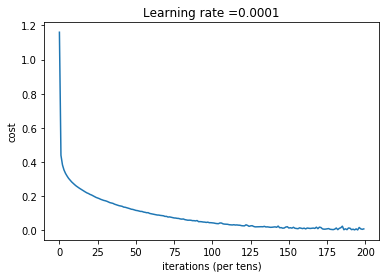

Parameters have been trained!
Train Accuracy: 0.999817
Test Accuracy: 0.8702


In [58]:
parameters = model(X_train, y_train, X_test, y_test)

**OUTPUT**

<b>TEST 1 : </b> 

<p>Took me around 50 mins to train 1000 epochs on CPU based tensorflow</p>
<ul>
<li>architecture:<u> linear->relu->linear->relu->linear->relu->linear->sigmoid</u></li>
<li>Train Accuracy : 0.999817</li>
<li>Test Accuracy : 0.8702</li>

</ul>

In [ ]:
def forward_propagation_for_predict(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3'] 
    W4 = parameters['W4']
    b4 = parameters['b4'] 
    
                                                           # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    A3 = tf.nn.relu(Z3)
    Z4 = tf.add(tf.matmul(W4,A3),b4)
    
    return Z4
    

In [ ]:
def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    W4 = tf.convert_to_tensor(parameters["W4"])
    b4 = tf.convert_to_tensor(parameters["b4"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3,
              "W4": W4,
              "b4": b4}
    
    x = tf.placeholder("float", [784, 1])
    
    z4 = forward_propagation_for_predict(x, params)
    p = tf.argmax(z4)
    
    with tf.Session() as sess:
        prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction
    